In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Read in the myopia csv

file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [5]:
# Split the dataframe into data and target

y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the X_train data.
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA

# Perform dimensionality reduction with PCA

pca = PCA(n_components = 0.90)
myopic_pca = pca.fit_transform(X_scaled)
mypic_pca_df = pd.DataFrame(data = X_scaled)
mypic_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Further reduce the dataset dimensions with t-SNE and visually inspect the results

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopic_pca)

C:\Users\jimst\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
X["x"] = transformed_features[:,0]
X["y"] = transformed_features[:,1]
X["class"] = df["MYOPIC"]

In [24]:
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-5.429005,-6.720551,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,18.599203,11.316900,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-15.359459,0.559227,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-4.177968,12.275033,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,19.992432,-5.332992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,-2.240266,-13.004369,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,18.839111,10.875216,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,20.826460,11.152469,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-21.973303,1.991627,0


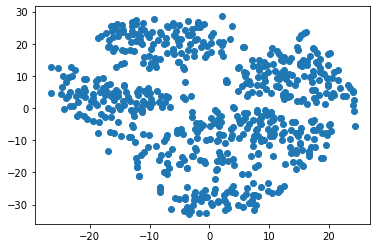

In [15]:
plt.scatter(X["x"], X["y"])
plt.show()

In [17]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopic_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot

myopic_data = {"k": k, "inertia": inertia}
df_myopic = pd.DataFrame(myopic_data)
df_myopic.head()

C:\Users\jimst\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


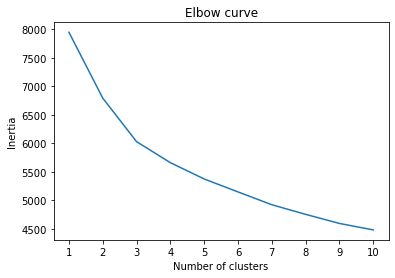

In [18]:
 # Plot the elbow curve to find the best candidate(s) for k
    
plt.plot(df_myopic['k'], df_myopic['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

## Recommendation:

### The cluster chart after applying t-NSE algorithm to the data appears to make 4 clusters though not clearly discinct. The elbow plot shows an elbow at K=3.